## Data Understanding
The data we are using comes from the King County housing data set.

In order to better understand data represented in the columns we accessed the King County Assessor website at: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

## Setting up standard imports
The cell below imports standard libraries that will be used for both data exploration, cleaning, and modeling. 

In [1]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

## Exploratory Data Analysis

Open csv file.

In [2]:
df = pd.read_csv('./data/cleaned_kc_house_data.csv')

Created Pairplot to look for any identifiable relationships between variables

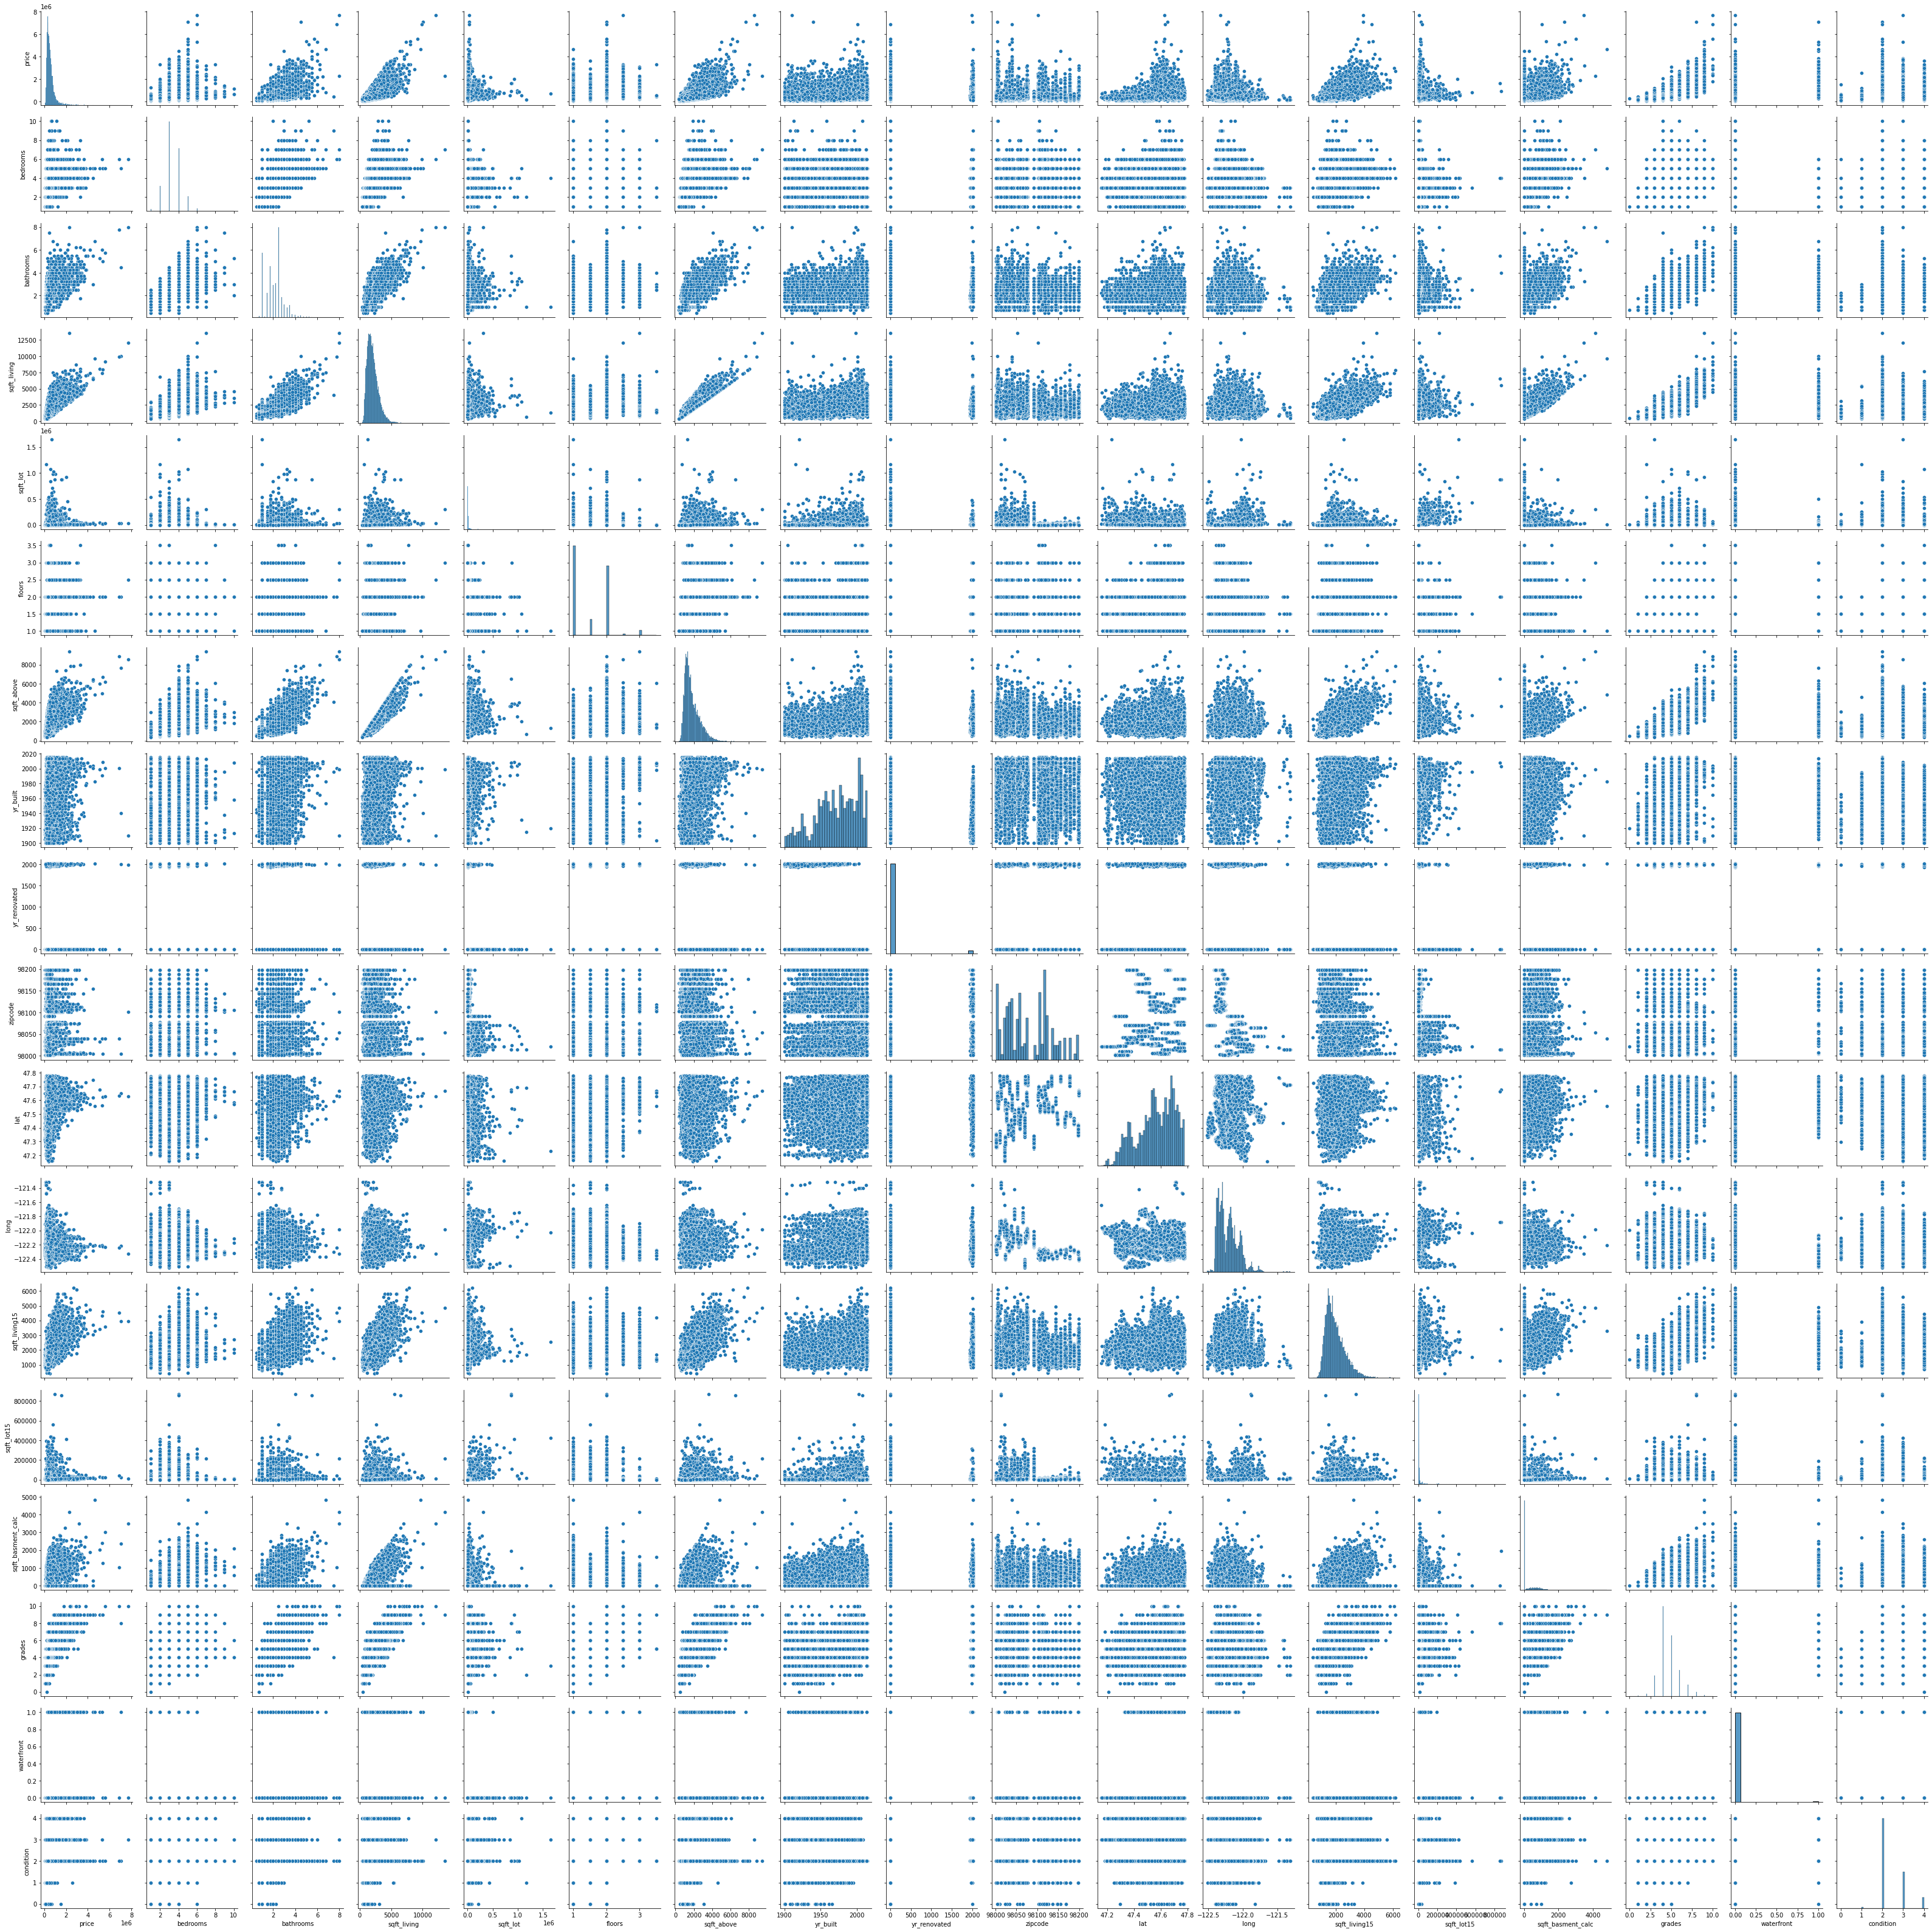

In [3]:
sns.pairplot(df)

Created correlation table and heatmap. Beginning to look for variables most related to price to perform simple linear regression.

In [4]:
df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot  \
price              1.000000  0.316504   0.525934     0.701948  0.089879   
bedrooms           0.316504  1.000000   0.528308     0.593780  0.033753   
bathrooms          0.525934  0.528308   1.000000     0.755742  0.088384   
sqft_living        0.701948  0.593780   0.755742     1.000000  0.173465   
sqft_lot           0.089879  0.033753   0.088384     0.173465  1.000000   
floors             0.256828  0.183648   0.502550     0.353913 -0.004813   
sqft_above         0.605401  0.493074   0.686655     0.876446  0.184145   
yr_built           0.053964  0.161719   0.507315     0.318255  0.052922   
yr_renovated       0.117948  0.016592   0.046923     0.050844  0.005041   
zipcode           -0.053408 -0.159056  -0.204814    -0.199823 -0.129577   
lat                0.306687 -0.011602   0.024303     0.052181 -0.085507   
long               0.022045  0.137205   0.224958     0.241261  0.230216   
sqft_living15      0.585274  0.405530   0.569948     0.756468  0.144749   
sqft_lot15         0.082848  0.032057   0.088315     0.184355  0.718202   
sqft_basment_calc  0.323800  0.309503   0.283433     0.435134  0.015432   
grades             0.667967  0.367001   0.665889     0.762825  0.114721   
waterfront         0.264308 -0.002026   0.063634     0.104642  0.021457   
condition          0.036029  0.023726  -0.126415    -0.059369 -0.008813   

                     floors  sqft_above  yr_built  yr_renovated   zipcode  \
price              0.256828    0.605401  0.053964      0.117948 -0.053408   
bedrooms           0.183648    0.493074  0.161719      0.016592 -0.159056   
bathrooms          0.502550    0.686655  0.507315      0.046923 -0.204814   
sqft_living        0.353913    0.876446  0.318255      0.050844 -0.199823   
sqft_lot          -0.004813    0.184145  0.052922      0.005041 -0.129577   
floors             1.000000    0.523956  0.489300      0.003558 -0.059547   
sqft_above         0.523956    1.000000  0.424116      0.020469 -0.261580   
yr_built           0.489300    0.424116  1.000000     -0.202269 -0.347184   
yr_renovated       0.003558    0.020469 -0.202269      1.000000  0.062314   
zipcode           -0.059547   -0.261580 -0.347184      0.062314  1.000000   
lat                0.049282   -0.001159 -0.148354      0.028004  0.266731   
long               0.125964    0.344869  0.409927     -0.064335 -0.564246   
sqft_living15      0.280118    0.731805  0.326313      0.000879 -0.279272   
sqft_lot15        -0.010722    0.195082  0.070749      0.004356 -0.147283   
sqft_basment_calc -0.245732   -0.052155 -0.132996      0.067176  0.074696   
grades             0.458820    0.756103  0.447844      0.015766 -0.185750   
waterfront         0.020798    0.071779 -0.024500      0.074007  0.028927   
condition         -0.263994   -0.158808 -0.361638     -0.055677  0.002851   

                        lat      long  sqft_living15  sqft_lot15  \
price              0.306687  0.022045       0.585274    0.082848   
bedrooms          -0.011602  0.137205       0.405530    0.032057   
bathrooms          0.024303  0.224958       0.569948    0.088315   
sqft_living        0.052181  0.241261       0.756468    0.184355   
sqft_lot          -0.085507  0.230216       0.144749    0.718202   
floors             0.049282  0.125964       0.280118   -0.010722   
sqft_above        -0.001159  0.344869       0.731805    0.195082   
yr_built          -0.148354  0.409927       0.326313    0.070749   
yr_renovated       0.028004 -0.064335       0.000879    0.004356   
zipcode            0.266731 -0.564246      -0.279272   -0.147283   
lat                1.000000 -0.135345       0.048721   -0.086129   
long              -0.135345  1.000000       0.335575    0.255572   
sqft_living15      0.048721  0.335575       1.000000    0.183499   
sqft_lot15        -0.086129  0.255572       0.183499    1.000000   
sqft_basment_calc  0.110391 -0.144496       0.200510    0.017569   
grades             0.113602  0.200304       

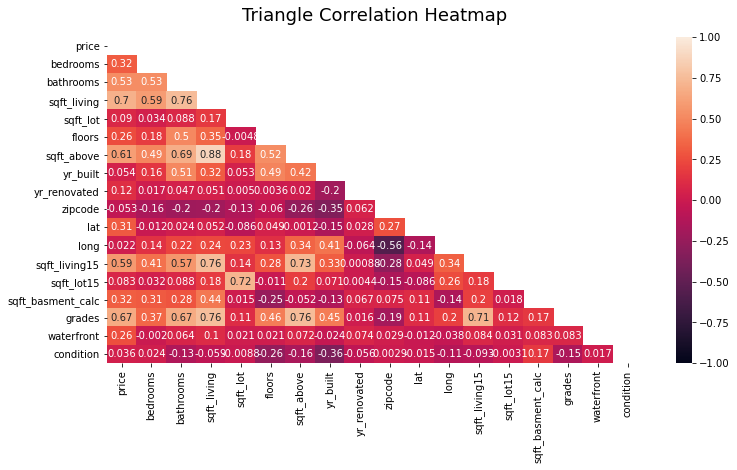

In [5]:
plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot = True);
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

From the heat map it appears that sqft_living seems to have the highest correlation to price. It is also moderately and highly correlated to sqft above, grades, sqft_living_15, number of bedrooms and bathrooms, which could cause issues with multicollinearity. 

## Baseline Linear Regression 
### Price & Square Foot Living 

We performed a simple linear regression to see how much sqft_living explains price, as it is the single variable with the best correlation to price.

In [6]:
y = df['price']
x = df['sqft_living']

In [7]:
price_living_results = sm.OLS(y, sm.add_constant(x)).fit()

In [8]:
price_living_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:15:08   Log-Likelihood:            -3.0003e+05
No. Observations:               21595   AIC:                         6.001e+05
Df Residuals:                   21593   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.403e+04   4410.136     -9.983      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8829      1.939    144.824      0.000     277.081     284.684
==============================================================================
Omnibus:                    14800.070   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542549.404
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.899   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model only explains 49% of variance for sale price of a house. Square feet of living space is a significant feature with a p-value of < 0.05. For every additional livable squarefoot you could expect to see an increase of 280 dollars in sale price. 

As stated before there seem to be some issues with multicollinearity based on the very high Cond. No.

### Exploring Categorical Data

Created histograms to explore categorical data types: waterfront, condition, & grade. We want to see the effects of these variables on prices, so we group the dataframe by each of these variables and graph the average price for each category within the variable. 

In [9]:
df.dtypes

price                float64
bedrooms               int64
bathrooms            float64
sqft_living            int64
sqft_lot               int64
floors               float64
sqft_above             int64
yr_built               int64
yr_renovated         float64
zipcode                int64
lat                  float64
long                 float64
sqft_living15          int64
sqft_lot15             int64
sqft_basment_calc      int64
grades               float64
waterfront           float64
condition            float64
dtype: object

In [10]:
df['waterfront'].value_counts()
#0:No, 1:Yes

0.0    21449
1.0      146
Name: waterfront, dtype: int64

In [11]:
waterfront_prices = df.groupby("waterfront")["price"].mean()

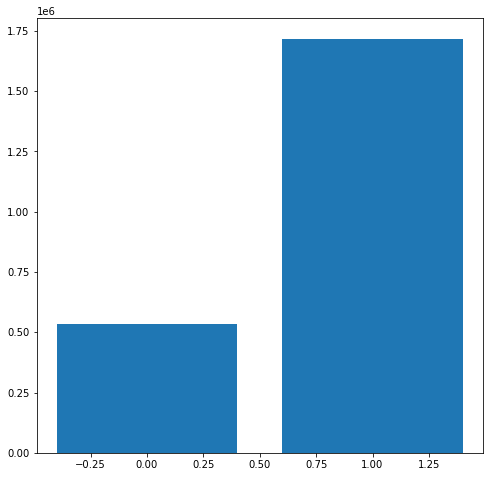

In [12]:
#average price per 'waterfront' value (no, unknown, yes)
fig, ax = plt.subplots(figsize = (8, 8))

ax.bar(x = waterfront_prices.index, height = waterfront_prices);

Whether or not a house is located on the waterfront seems to have a significant effect on the sale price of the house.

In [13]:
df['condition'].value_counts()
#0:worst condition, 4:best condition

2.0    14019
3.0     5677
4.0     1700
1.0      170
0.0       29
Name: condition, dtype: int64

In [14]:
condition_prices = df.groupby("condition")["price"].mean()

In [15]:
df['condition'].value_counts()

2.0    14019
3.0     5677
4.0     1700
1.0      170
0.0       29
Name: condition, dtype: int64

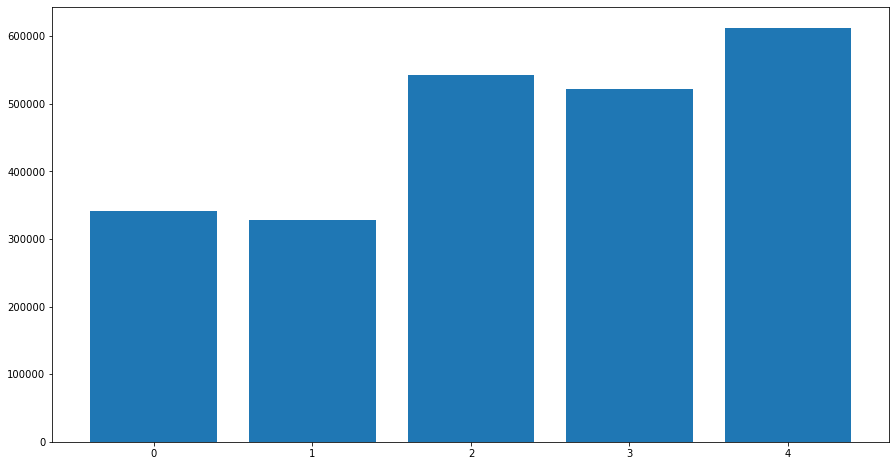

In [16]:
#average price per 'condtion' value (poor, fair, average, good, very good)
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(x = condition_prices.index, height = condition_prices);

The condition of a house seems to have some effect on the sale price, especially if it is below average, or the highest value of very good.

In [17]:
df['grades'].value_counts()
#0:lowest grade, 10:highest grade

4.0     8972
5.0     6065
6.0     2615
3.0     2038
7.0     1134
8.0      399
2.0      242
9.0       89
1.0       27
10.0      13
0.0        1
Name: grades, dtype: int64

In [18]:
grade_prices = df.groupby("grades")["price"].mean()

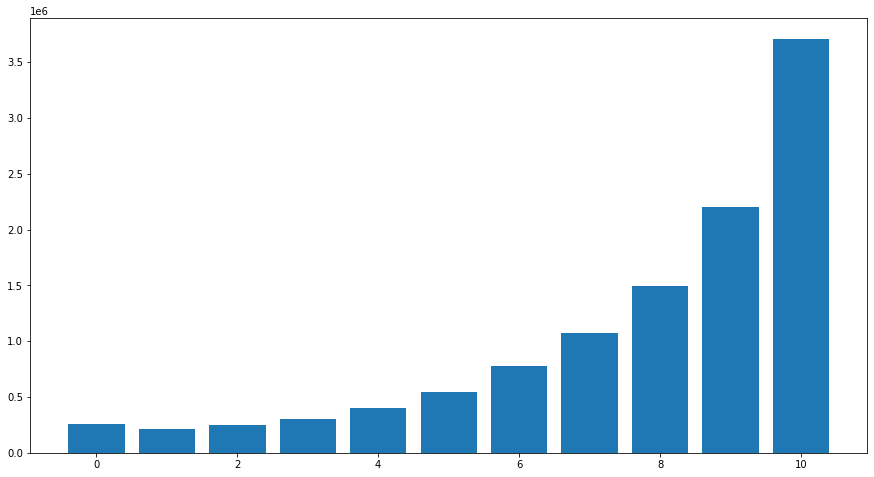

In [19]:
#average price per 'grade' value ('3 Poor'-'13 Mansion' originally)
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(x = grade_prices.index, height = grade_prices);

Price and grade have a strong relationship, with price increasing by a greater magnitude with each grade that increases, though the relationship is less strong at houses with lower grades.



Because of the description of Grade in our original data from King County Housing Authority, we explore how much variance in price can be explained by these variables separately compared to the product of these two variables.

In [20]:
y = df['price']
X = df.loc[:, ['sqft_living', 'grades']]

In [21]:
results_grade = sm.OLS(y, sm.add_constant(X)).fit()

In [22]:
results_grade.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:15:09   Log-Likelihood:            -2.9910e+05
No. Observations:               21595   AIC:                         5.982e+05
Df Residuals:                   21592   BIC:                         5.982e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.05e+05   7266.316    -41.980      0.000   -3.19e+05   -2.91e+05
sqft_living   184.1451      2.873     64.102      0.000     178.514     189.776
grades       9.924e+04   2248.046     44.145      0.000    9.48e+04    1.04e+05
==============================================================================
Omnibus:                    16958.903   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005547.569
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      35.770   Cond. No.                     1.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model exploring sqft_living and grade can account for 53.5% of variance in price. This is about a 4% increase from just square feet living model.

By this model, each square foot adds about \\$184 to sale price. As grade increases, sale price goes up about $10k per grade. This model also returns a Cond. No. that suggests high variance


Below, we create a new column in our dataframe for the product of sqft_living and grade

**Exploring potential feature transformation**

In [23]:
df['sqft_living_grade_product'] = df['sqft_living'] * df['grades']

In [24]:
y = df['price']
X = df.loc[:, ['sqft_living_grade_product']]

In [25]:
results_product = sm.OLS(y, sm.add_constant(X)).fit()

In [26]:
results_product.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                 3.070e+04
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:15:09   Log-Likelihood:            -2.9781e+05
No. Observations:               21595   AIC:                         5.956e+05
Df Residuals:                   21593   BIC:                         5.956e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.489e+05   2751.417     54.119      0.000    1.44e+05    1.54e+05
sqft_living_grade_product    37.2339      0.212    175.220      0.000      36.817      37.650
==============================================================================
Omnibus:                    12477.507   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           323737.771
Skew:                           2.291   Prob(JB):                         0.00
Kurtosis:                      21.406   Cond. No.                     2.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model exploring the product of grade and sqft_living sale price can account for 58.7% of variance in price. This is about a 4% increase from the model that uses these two variables separately to explain price.

However, because multicollinearity of this model is higher, and we cannot fully interpret the coefficient that this model returns, we choose to look at sqft_living and grade separately, with the understanding they are related and very significant in explaining the variance of price in houses.

In [28]:
df.drop('sqft_living_grade_product', axis=1, inplace=True)

We created histograms of each variable to visualize and explore the distribution of each variable and determine whether further feature transformation was warranted.

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'sqft_basment_calc'}>,
        <AxesSubplot:title={'center':'grades'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

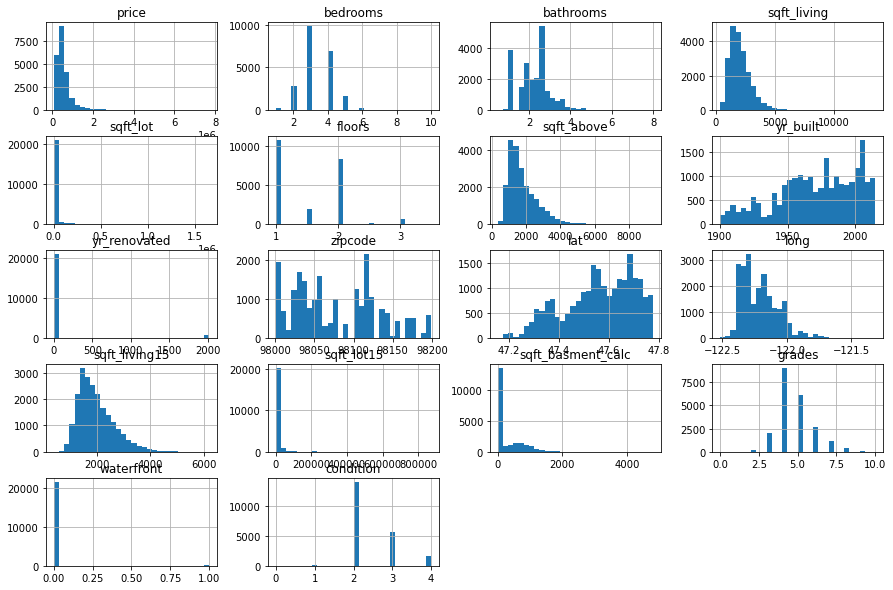

In [29]:
df.hist(bins=30, figsize=(15, 10))

Though some variables had skewed distributions, we decided not to further transfrom any variables before performing analysis

## Multiple Linear Regression

### Exploring Multicollinearity

In [30]:
abs(df.corr()) > 0.75

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price               True     False      False        False     False   False   
bedrooms           False      True      False        False     False   False   
bathrooms          False     False       True         True     False   False   
sqft_living        False     False       True         True     False   False   
sqft_lot           False     False      False        False      True   False   
floors             False     False      False        False     False    True   
sqft_above         False     False      False         True     False   False   
yr_built           False     False      False        False     False   False   
yr_renovated       False     False      False        False     False   False   
zipcode            False     False      False        False     False   False   
lat                False     False      False        False     False   False   
long               False     False      False        False     False   False   
sqft_living15      False     False      False         True     False   False   
sqft_lot15         False     False      False        False     False   False   
sqft_basment_calc  False     False      False        False     False   False   
grades             False     False      False         True     False   False   
waterfront         False     False      False        False     False   False   
condition          False     False      False        False     False   False   

                   sqft_above  yr_built  yr_renovated  zipcode    lat   long  \
price                   False     False         False    False  False  False   
bedrooms                False     False         False    False  False  False   
bathrooms               False     False         False    False  False  False   
sqft_living              True     False         False    False  False  False   
sqft_lot                False     False         False    False  False  False   
floors                  False     False         False    False  False  False   
sqft_above               True     False         False    False  False  False   
yr_built                False      True         False    False  False  False   
yr_renovated            False     False          True    False  False  False   
zipcode                 False     False         False     True  False  False   
lat                     False     False         False    False   True  False   
long                    False     False         False    False  False   True   
sqft_living15           False     False         False    False  False  False   
sqft_lot15              False     False         False    False  False  False   
sqft_basment_calc       False     False         False    False  False  False   
grades                   True     False         False    False  False  False   
waterfront              False     False         False    False  False  False   
condition               False     False         False    False  False  False   

                   sqft_living15  sqft_lot15  sqft_basment_calc  grades  \
price                      False       False              False   False   
bedrooms                   False       False              False   False   
bathrooms                  False       False              False   False   
sqft_living                 True       False              False    True   
sqft_lot                   False       False              False   False   
floors                     False       False              False   False   
sqft_above                 False       False              False    True   
yr_built                   False       False              False   False   
yr_renovated               False       False              False   False   
zipcode                    False       False              False   False   
lat                        False       False              False   False   
long                       False       False              False   False   
sq

In [31]:
df_multico = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_multico['pairs'] = list(zip(df_multico.level_0, df_multico.level_1))

df_multico.set_index(['pairs'], inplace = True)

df_multico.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_multico.columns = ['cc']

df_multico.drop_duplicates(inplace=True)

df_multico[(df_multico.cc>.75) & (df_multico.cc<1)]

cc
pairs                                 
(sqft_above, sqft_living)     0.876446
(sqft_living, grades)         0.762825
(sqft_living15, sqft_living)  0.756468
(sqft_above, grades)          0.756103
(sqft_living, bathrooms)      0.755742

These columns are all highly correlated with one another and are candidates to be dropped from future models, to minimize the effect of their interaction. 

**Running multiple linear regression**

Created a Linear Regression model including all variables in dataframe.

In [41]:
y = df['price']
X = df.drop('price', axis = 1)

In [42]:
multi_baseline = sm.OLS(y, sm.add_constant(X)).fit()
multi_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3028.
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:29:10   Log-Likelihood:            -2.9465e+05
No. Observations:               21595   AIC:                         5.893e+05
Df Residuals:                   21578   BIC:                         5.895e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -3.21e+05   2.96e+06     -0.109      0.913   -6.11e+06    5.47e+06
bedrooms          -4.322e+04   2005.500    -21.549      0.000   -4.71e+04   -3.93e+04
bathrooms          4.452e+04   3311.511     13.444      0.000     3.8e+04     5.1e+04
sqft_living         116.4663      2.311     50.392      0.000     111.936     120.996
sqft_lot              0.1668      0.049      3.436      0.001       0.072       0.262
floors             9133.1382   3648.959      2.503      0.012    1980.910    1.63e+04
sqft_above           65.1491      2.274     28.653      0.000      60.692      69.606
yr_built          -2802.5140     72.660    -38.570      0.000   -2944.933   -2660.095
yr_renovated         25.9009      4.033      6.423      0.000      17.997      33.805
zipcode            -513.4746     33.309    -15.415      0.000    -578.763    -448.186
lat                 5.75e+05   1.08e+04     53.043      0.000    5.54e+05    5.96e+05
long              -2.328e+05   1.33e+04    -17.478      0.000   -2.59e+05   -2.07e+05
sqft_living15        35.4000      3.453     10.252      0.000      28.632      42.168
sqft_lot15           -0.3866      0.074     -5.200      0.000      -0.532      -0.241
sqft_basment_calc    51.3173      2.648     19.378      0.000      46.127      56.508
grades             1.007e+05   2184.683     46.093      0.000    9.64e+04    1.05e+05
waterfront          7.77e+05   1.72e+04     45.170      0.000    7.43e+05    8.11e+05
condition          2.753e+04   2378.156     11.576      0.000    2.29e+04    3.22e+04
==============================================================================
Omnibus:                    18073.324   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1680075.494
Skew:                           3.501   Prob(JB):                         0.00
Kurtosis:                      45.640   Cond. No.                     2.59e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.27e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Initial interpretations:

R-squared value increased as expected. It increased from 49% in simple Linear Regression using just sqft_living to explain price to over 69%.


p-values lower than .05 indicate significance for all variables.


will need to examine issues of multicollinearity as Cond. No. is very large.

**Iterating Model**

Because of multicollinearity issues, we chose to explore variance inflation factor between the independent variables of our model, to see which ones were interacting with each other the most

In [43]:
# code by Aniruddha Bhandari
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [44]:
calc_vif(X)

C:\Users\FIDataSci.DESKTOP-5QIEL80\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


variables           VIF
0            bedrooms  2.528938e+01
1           bathrooms  2.882890e+01
2         sqft_living           inf
3            sqft_lot  2.373002e+00
4              floors  1.689011e+01
5          sqft_above           inf
6            yr_built  9.242021e+03
7        yr_renovated  1.152747e+00
8             zipcode  1.635049e+06
9                 lat  1.378615e+05
10               long  1.360704e+06
11      sqft_living15  2.656487e+01
12         sqft_lot15  2.596702e+00
13  sqft_basment_calc           inf
14             grades  5.664131e+01
15         waterfront  1.037046e+00
16          condition  1.787208e+01

We found several variables had large effects on each other. Logically, zip code will be a result of latitude and longitude. The same is true for sqft_above being a result of sqft_living - sqft_basement_calc. Because of these causal relationships, we determined those variables would be dropped from our model, as the data they represent is accounted for elsewhere.

In [37]:
#our variables for Linear Regression
relevant_columns = [
    'sqft_living',
    'grades',
    'condition',     
    'waterfront',      
    'sqft_basment_calc',  
    'sqft_lot15', 
    'sqft_living15',    
    'long', 
    'lat',   
    'yr_renovated',     
    'yr_built',  
    'sqft_lot', 
    'floors',
    'bathrooms',
    'bedrooms',      
]

In [38]:
regression_categories = df[relevant_columns]
y= df['price']
x= regression_categories
multi_results = sm.OLS(y, sm.add_constant(x)).fit()
multi_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     3179.
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:26:38   Log-Likelihood:            -2.9477e+05
No. Observations:               21595   AIC:                         5.896e+05
Df Residuals:                   21579   BIC:                         5.897e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.856e+07   1.61e+06    -23.883      0.000   -4.17e+07   -3.54e+07
sqft_living         180.0663      3.762     47.864      0.000     172.692     187.440
grades             1.017e+05   2195.705     46.306      0.000    9.74e+04    1.06e+05
condition          3.155e+04   2376.720     13.276      0.000    2.69e+04    3.62e+04
waterfront         7.719e+05   1.73e+04     44.638      0.000    7.38e+05    8.06e+05
sqft_basment_calc   -16.3871      4.382     -3.739      0.000     -24.977      -7.797
sqft_lot15           -0.3965      0.075     -5.304      0.000      -0.543      -0.250
sqft_living15        39.6803      3.461     11.467      0.000      32.897      46.463
long              -1.449e+05   1.21e+04    -11.973      0.000   -1.69e+05   -1.21e+05
lat                5.393e+05   1.06e+04     50.650      0.000    5.18e+05     5.6e+05
yr_renovated         26.9374      4.054      6.645      0.000      18.991      34.884
yr_built          -2651.5810     72.391    -36.629      0.000   -2793.472   -2509.690
floors             3754.6146   3652.101      1.028      0.304   -3403.773    1.09e+04
sqft_lot              0.1635      0.049      3.349      0.001       0.068       0.259
bathrooms          4.538e+04   3329.147     13.631      0.000    3.89e+04    5.19e+04
bedrooms          -4.143e+04   2013.096    -20.580      0.000   -4.54e+04   -3.75e+04
==============================================================================
Omnibus:                    18216.491   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1699078.585
Skew:                           3.546   Prob(JB):                         0.00
Kurtosis:                      45.872   Cond. No.                     5.85e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our resulting Linear Regression Model explained slightly less (.4%) of the variance in the sale price of houses, but with a Cond. No. that was reduced by more than 50%.

Below, we explored how errors in our model were distributed with a qq plot.

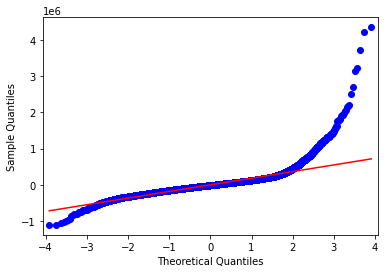

In [45]:
sm.qqplot(multi_results.resid, line="r");

Based on this plot, we determined that the greatest error in predicted price in our model resulted from the houses with the greatest sale price in our sample. We determined that error could be reduced if outliers were removed, or that there was a factor influencing the most expensive houses that was not accounted for in our model

## Exploration of Location

Because latitude and longitude did seem to have signifcance in explaining price, we left them in our model. However, we hypothesized that latitude and longitude are unlikely to have linear relationships with price, and wanted to further explore the relationship between location of houses and their sale price. We decided to do explore this graphically by scatter plotting house latitudes and longitudes and adjusting color of based upon the price.

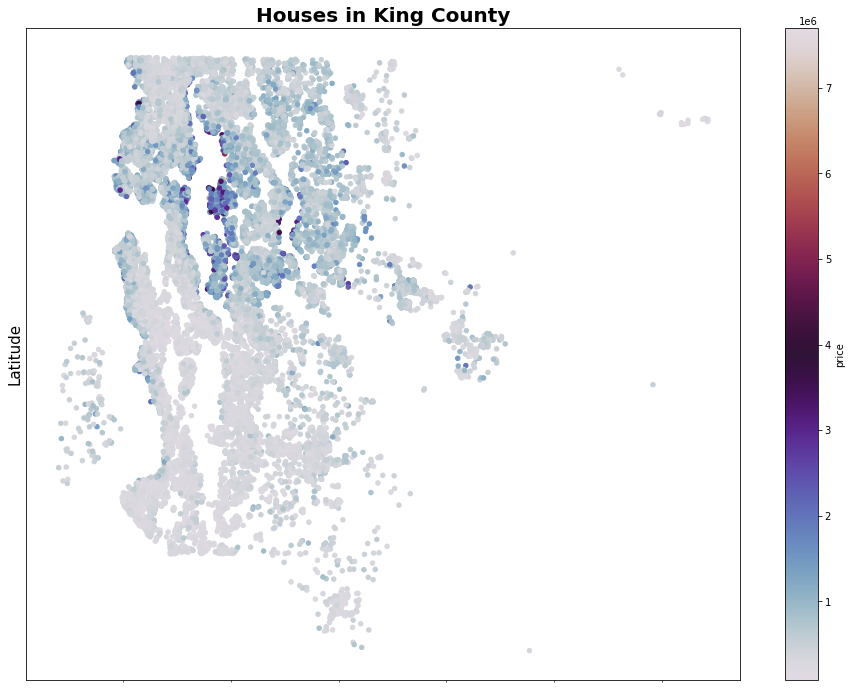

In [46]:
df.plot(kind = 'scatter', x='long', y='lat', figsize=(16,12), 
        c= 'price', cmap = 'twilight')
plt.title('Houses in King County', fontsize =20, weight = 'bold')
plt.ylabel('Latitude', fontsize =15)
plt.xlabel('Longitude', fontsize =15)

plt.xticks([])
plt.yticks([]);

From this plot, and a look at a map of King County, we interpretted that there were indeed locations in King County that accounted for variance in sale price, especially for areas near water or located within Seattle. Other locations clearly explained price as well, as specifc cities and neighborhoods had consistently different prices. Although we did not represent this data in our model, we continued our analysis with the understanding that location had a significant effect on variance of sale price for houses.